In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict 

from Waligorski import Waligorski


%matplotlib notebook
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [21]:
ions = OrderedDict()
ions['0.9 MeV/amu Au'] = {'energy':185e3,
                         'mass':196.97,
                         'eloss':33}      
ions['5.9 MeV/amu Au'] = {'energy':5.9e3*196.97,
                         'mass':196.97,
                         'eloss':33}       


d_step = 0.3e-10
t = np.arange(d_step, 15e-9, d_step)

In [22]:
waligorski = []

for ion, param in ions.items():
    wal = Waligorski(t, d_step, param['energy'], param['mass'], param['eloss'])
    wal.name = ion
    wal.compute()
    waligorski.append(wal)


 1.85e+02 MeV
mass: 0.000000
beta: 0.044907
Rmax: 2.009879e-05
Rmin: 4.290275e-08
Emin: 0.010267
k: 0.000006
e density: 2.79 g/cm^3
e loss: 33.00 keV/nm
d step: 3.000000e-02 nm
Total Energy Deposited: 3.300000e+01
Normal: 1.604861e-16
W1D sum: 3.300000e+01

 1.16e+03 MeV
mass: 0.000000
beta: 0.112551
Rmax: 4.378629e-04
Rmin: 4.290275e-08
Emin: 0.010267
k: 0.000006
e density: 2.79 g/cm^3
e loss: 33.00 keV/nm
d step: 3.000000e-02 nm
Total Energy Deposited: 3.300000e+01
Normal: 8.204279e-16
W1D sum: 3.300000e+01


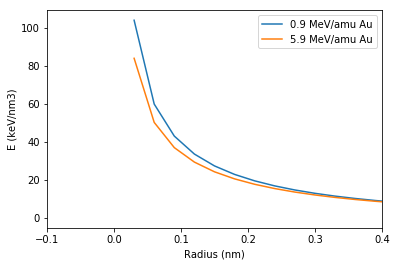

In [23]:
plt.figure()
for w in waligorski:
    plt.plot(w.t_r*1e9, w.W1D,'-', label=w.name)
    

plt.xlim(-0.1, 0.4)
plt.legend()
plt.xlabel('Radius (nm)')
plt.ylabel('E (keV/nm3)');

# Convert to 2D

In [24]:
%%time
size = (101, 101)
cell_size=0.3e-9 #0.3e-9#

print('Total Size: %.2f x %0.2f nm' %(size[0]*cell_size*1e9, size[1]*cell_size*1e9))


for w in waligorski:
    print(w.name)
    w.convert_W2D(size, cell_size, n_subcells=11)   

Total Size: 30.30 x 30.30 nm
0.9 MeV/amu Au
5.9 MeV/amu Au
CPU times: user 14.1 s, sys: 88 ms, total: 14.2 s
Wall time: 14.1 s


     Ion	Ion Energy (MeV)	Max (eV)	Final ee (keV/nm)	Total E (keV)
0.9 MeV/amu Au : 	      185.0	      1.10	      33.00	      9.90
5.9 MeV/amu Au : 	      1162.1	      0.94	      33.00	      9.90


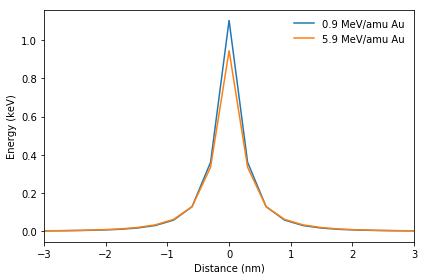

In [25]:
fig, ax = plt.subplots(figsize=(6,4))
# axins = ax.inset_axes([0.03, 0.35, 0.3,0.6])
center_point = (int((size[0])/2), int((size[1])/2))


for i,w in enumerate(waligorski):
    W2D = w.W2D
    xx = np.linspace(-(W2D.shape[0]-1)*cell_size*1e9/2, (W2D.shape[0]-1)*cell_size*1e9/2, W2D.shape[0])
    ax.plot(xx, W2D[:,center_point[0]] , '-', color=colors[i], label=w.name)
    
    
print('     Ion', 'Ion Energy (MeV)', 'Max (eV)', 'Final ee (keV/nm)', 'Total E (keV)', sep='\t')
for i,w in enumerate(waligorski):
    print(w.name + ' : ', '%0.1f'%(w.E*1e-3), '%0.2f'%w.W2D.max(), '%0.2f'%(w.W2D.sum()/(cell_size*1e9)),
          '%0.2f'%(w.eloss*cell_size*1e9), sep='\t      ')



ax.set_xlim(-3,3)
ax.set_xlabel('Distance (nm)')
ax.set_ylabel('Energy (keV)')

ax.legend(frameon=False);
fig.tight_layout();

# Save file

In [28]:
index_to_save = 1
np.savetxt('Wal_Dep_Grid_GaN.dat', waligorski[index_to_save].W2D*1e3, fmt='%.7e', delimiter='\t')